In [1]:
import os
import numpy
import pyarrow.parquet as pq
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
%matplotlib inline

## ASOS Mixture

In [48]:
path1 = '/glade/p/cisl/aiml/ai2es/winter_ptypes/precip_rap/ASOS_mixture/'
file1 = path1 + 'ASOS_rap_20191209.parquet'
files1 = sorted(os.listdir(path1))
print(len(files1))
index = files1.index('ASOS_rap_20140101.parquet')
print(index)

1884
243


In [59]:
parquet_file = pq.ParquetFile(file1)
metadata = parquet_file.metadata
metadata

  created_by: parquet-cpp-arrow version 6.0.1
  num_columns: 408
  num_rows: 256
  num_row_groups: 1
  format_version: 1.0
  serialized_size: 207748

In [60]:
metadata.row_group(0).column(1)

  file_offset: 1071
  file_path: 
  physical_type: DOUBLE
  num_values: 256
  path_in_schema: lat
  is_stats_set: True
  statistics:
      has_min_max: True
      min: 35.144
      max: 48.717
      null_count: 0
      distinct_count: 0
      num_values: 256
      physical_type: DOUBLE
      logical_type: None
      converted_type (legacy): NONE
  compression: SNAPPY
  encodings: ('PLAIN_DICTIONARY', 'PLAIN', 'RLE')
  has_dictionary_page: True
  dictionary_page_offset: 285
  data_page_offset: 772
  total_compressed_size: 786
  total_uncompressed_size: 850

In [61]:
schema = parquet_file.schema
# schema

In [72]:
data = pq.read_table(file1)
# data
# read only certain columns for much faster performance

In [ ]:
pddata = data.to_pandas()
print(type(pddata))
pddata

In [64]:
pddata.columns

Index(['datetime', 'lat', 'lon', 'report_count', 'ra_percent', 'sn_percent',
       'pl_percent', 'fzra_percent', 'CFRZR_-', 'CICEP_-',
       ...
       'VVEL_775_Pa/s', 'VVEL_800_Pa/s', 'VVEL_825_Pa/s', 'VVEL_850_Pa/s',
       'VVEL_875_Pa/s', 'VVEL_900_Pa/s', 'VVEL_925_Pa/s', 'VVEL_950_Pa/s',
       'VVEL_975_Pa/s', 'idx'],
      dtype='object', length=407)

In [65]:
lats = pddata['lat'].values
lons = pddata['lon'].values

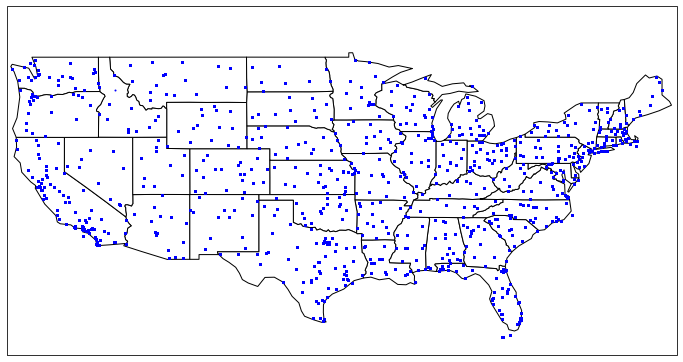

In [14]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-125, -66.5, 23, 50])
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)
ax.add_geometries(shpreader.Reader(states_shp).geometries(), ccrs.PlateCarree(), 
                  facecolor='white', edgecolor='k')

for i in range(index):
    data = pd.read_parquet(path1+files1[i])
    lons = data['lon'].values
    lats = data['lat'].values
    ax.plot(lons, lats, '.b', markersize=2)

In [15]:
plt.savefig('asos2013.png')

<Figure size 432x288 with 0 Axes>

In [70]:
fig = plt.figure(figsize=(14,8))
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)
titles = ['RA', 'SN', 'PL', 'FZRA']
ax = []
for i in range(4):
    ax.append(fig.add_subplot(2, 2, i+1, projection=ccrs.PlateCarree()))
    ax[i].set_extent([-125, -66.5, 23, 50])
    ax[i].add_geometries(shpreader.Reader(states_shp).geometries(), ccrs.PlateCarree(), 
                  facecolor='white', edgecolor='k')
    ax[i].set_title(titles[i])

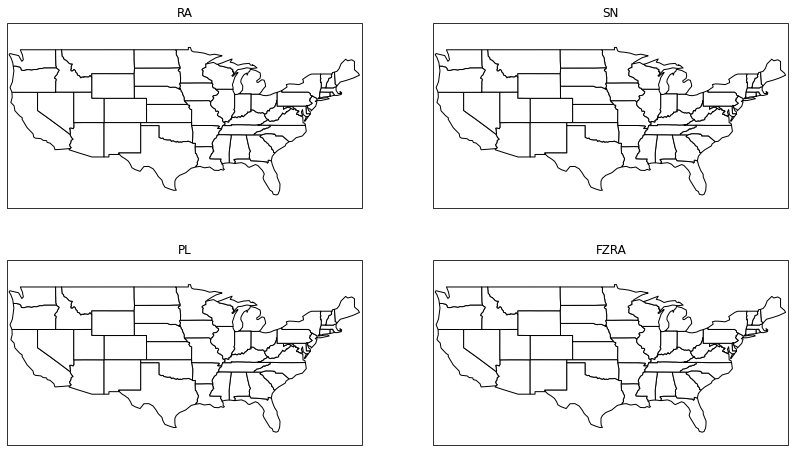

In [70]:
def choose_precip(file):
    pass

## mPING Mixture

In [36]:
path2 = '/glade/p/cisl/aiml/ai2es/winter_ptypes/precip_rap/mPING_mixture/'
file2 = path2 + 'mPING_rap_20191209.parquet'
files2 = sorted(os.listdir(path2))
print(len(files2))
index = files2.index('mPING_rap_20140101.parquet')
print(index)

2499
350


In [33]:
index /= 2
print(index)
index = int(index)
print(index)

175.0
175


In [19]:
parquet_file = pq.ParquetFile(file2)
metadata = parquet_file.metadata
metadata

  created_by: parquet-cpp-arrow version 6.0.1
  num_columns: 408
  num_rows: 315
  num_row_groups: 1
  format_version: 1.0
  serialized_size: 207757

In [45]:
metadata.row_group(0).column(9)

  file_offset: 6747
  file_path: 
  physical_type: FLOAT
  num_values: 315
  path_in_schema: CICEP_-
  is_stats_set: True
  statistics:
      has_min_max: True
      min: -0.0
      max: 1.0
      null_count: 0
      distinct_count: 0
      num_values: 315
      physical_type: FLOAT
      logical_type: None
      converted_type (legacy): NONE
  compression: SNAPPY
  encodings: ('PLAIN_DICTIONARY', 'PLAIN', 'RLE')
  has_dictionary_page: True
  dictionary_page_offset: 6651
  data_page_offset: 6675
  total_compressed_size: 96
  total_uncompressed_size: 92

In [ ]:
schema = parquet_file.schema
schema

In [47]:
data = pd.read_parquet(file2)
lons = data['lon'].values
lats = data['lat'].values

def change_lon_range(lons):
    for i in range(len(lons)):
        lons[i] -= 360
        
change_lon_range(lons)
print(lons[0:10])
# print(data['CICEP_-'])

[-107.126883   -105.44213822 -108.52639793  -91.58064604  -89.94100887
  -90.41373716  -97.16285531  -96.99658742  -97.16551128  -97.16817378]


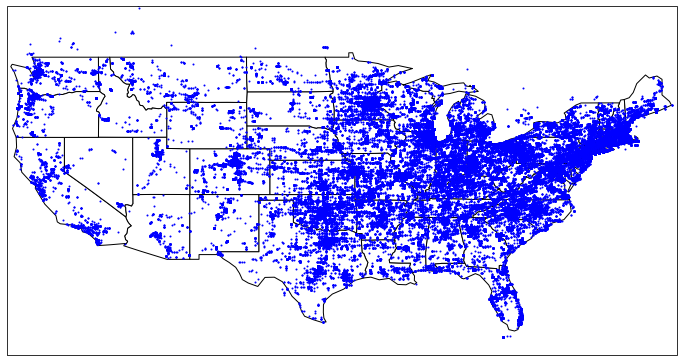

In [38]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-125, -66.5, 23, 50])
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)
ax.add_geometries(shpreader.Reader(states_shp).geometries(), ccrs.PlateCarree(), 
                  facecolor='white', edgecolor='k')

for i in range(index):
    data = pd.read_parquet(path2+files2[i])
    lons = data['lon'].values 
    change_lon_range(lons)
    lats = data['lat'].values
    ax.plot(lons, lats, '.b', markersize=2)

In [40]:
plt.savefig('mping_firsthalf2013.png')

<Figure size 432x288 with 0 Axes>

## Conclusions

* mPING has a lot more observations than ASOS

* concentrations of observations are much higher on the east coast than the west coast for both, especially mPING

* more generally, the observations are concentrated at areas of higher population density